In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date

In [4]:
tickers = pd.read_csv('constituents.csv')

In [7]:
tickers.loc[tickers['GICS Sector'] == 'Utilities','Symbol'].unique()

array(['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED',
       'CEG', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG', 'ES', 'EXC', 'FE',
       'NEE', 'NI', 'NRG', 'PCG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'VST',
       'WEC', 'XEL'], dtype=object)

In [2]:
tickers = pd.read_csv('constituents.csv')
tickers = list(tickers['Symbol'].unique())

In [9]:
start_date = date(2022,1,1)
end_date = date(2025,1,1)

In [10]:
df = yf.download(tickers = tickers, start = start_date, end = end_date)

[************          24%                       ]  120 of 503 completedCould not get exchangeTimezoneName for ticker 'LEN' reason: 'chart'
[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01)')
['LEN', 'BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [67]:
# df['Close'].to_csv('SP500.csv')

In [103]:
df = pd.read_csv('SP500.csv')

In [104]:
df = df.set_index('Date')

In [105]:
df = np.log(df).diff().dropna(thresh=2).reset_index()

In [106]:
df = df.drop(columns=['Date','BF.B','LEN', 'BRK.B','CEG', 'GEHC', 'GEV', 'KVUE', 'SOLV', 'SW', 'VLTO'])

In [107]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [108]:
# Assuming 'data' is a DataFrame with the data you want to perform PCA on
features = df.columns  # If your data has columns you want to use for PCA

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

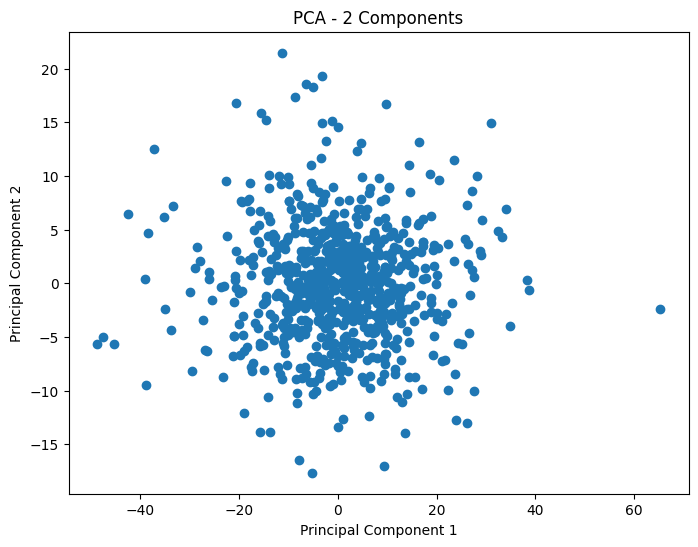

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Components')
plt.show()


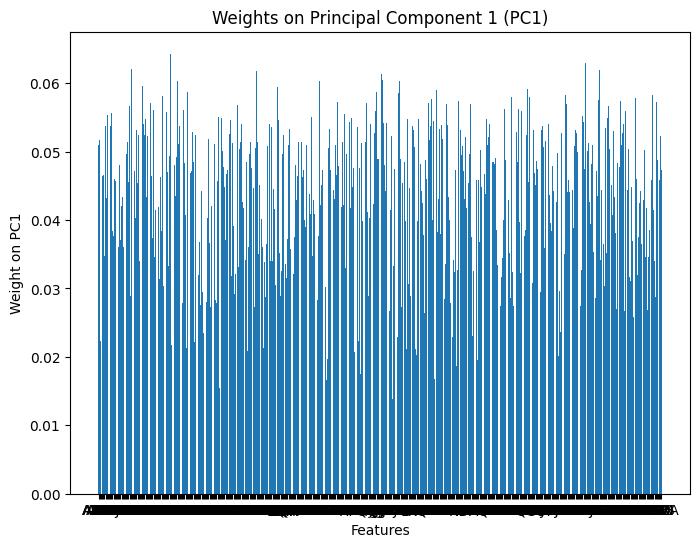

In [110]:
pc1_weights = pca.components_[0]  # The first row corresponds to PC1

# Create a bar plot to visualize the weights
plt.figure(figsize=(8, 6))
plt.bar(df.columns, pc1_weights)
plt.xlabel('Features')
plt.ylabel('Weight on PC1')
plt.title('Weights on Principal Component 1 (PC1)')
plt.show()